#Lending CLub Case Study Data Load --> Data Processing / Cleaning --> Data Reporting (for analysis and decision making)

In [110]:
# Import needed libraries 

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


#Load data from loan.csv

In [113]:
df = pd.read_csv("loan.csv")
#ideally file should loaded completely no warnings that would be the clean load. 

/var/folders/wy/hh9y_svs031d5b6m72ty945c0000gn/T/ipykernel_19794/414883108.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan.csv")


In [115]:
# Here Warning suggest mixed data types thus need to fix these so unquiness can be maintained
column_name_47 = df.columns[46]
print("Column 47 name:", column_name_47)

Column 47 name: last_pymnt_amnt


In [117]:
# Get the values in the column
df['last_pymnt_amnt'].unique()

array([171.62, 119.66, 649.91, ...,  80.9 , 281.94, 256.59])

In [119]:
# Reload the csv file make sure no warnings
df = pd.read_csv("loan.csv", dtype={'last_pymnt_amnt': 'str'}, low_memory=False)

In [120]:
#Get all column headers 
cols = df.columns
print(list(cols))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [123]:
for col in df.columns:
    print(col)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

## Date processing and cleanup 

### Get all the null values from each columns 

In [127]:
print(df.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [129]:
# percentage of null values
null_value_percent = round(100*(df.isnull().sum()/len(df.index)), 2)

null_value_percent[null_value_percent > 60]

mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m                      100.00
acc_open_past_24

In [131]:
# Removing columns that have incomplete data that will columns with more than 60% null values
df.drop(null_value_percent[ null_value_percent > 60 ].index, axis=1, inplace=True)

In [133]:
df.shape

(39717, 54)

In [135]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Remove colums with repeatitions 

In [138]:
# find number of unique value in each column
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [140]:
df.shape

(39717, 54)

In [148]:
df.nunique()[df.nunique()==1]
df.drop(df.nunique()[df.nunique()==1].index, axis=1, inplace=True)

In [150]:
# reduced shape meaning data is furthur cleaned up by removing above columns 
df.shape

(39717, 45)

In [152]:
df.nunique().sort_values().head()

term                    2
pub_rec_bankruptcies    3
loan_status             3
verification_status     3
pub_rec                 5
dtype: int64

### Working on updates to Loan Status

In [155]:
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [157]:
# interest Rate 
df['int_rate'].describe()

count      39717
unique       371
top       10.99%
freq         956
Name: int_rate, dtype: object

In [159]:
df.shape

(39717, 45)

In [161]:
# Date Format

df.issue_d=pd.to_datetime(df.issue_d,format='%b-%y')
df['issue_year']=pd.to_datetime(df.issue_d,format='%b-%y').dt.year
df['issue_month']=pd.to_datetime(df.issue_d,format='%b-%y').dt.month
df['issue_weekday']=pd.to_datetime(df.issue_d,format='%b-%y').dt.weekday

In [163]:
df.shape

(39717, 48)

<Figure size 800x300 with 0 Axes>

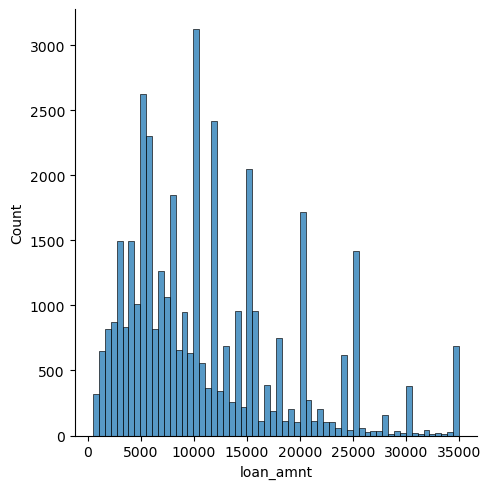

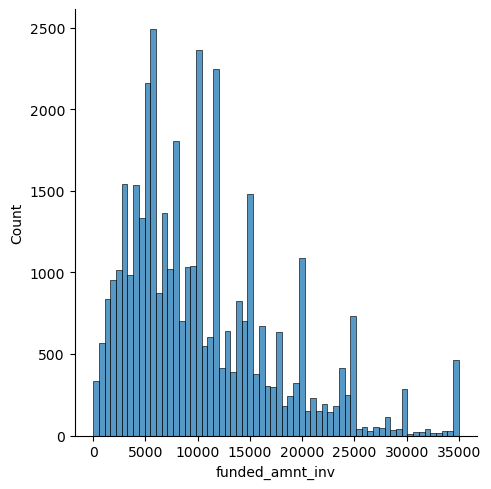

In [166]:
# Generate plots with Loan amount and funded amount invoice

plt.figure(figsize=(8,3))
# Loan Amount 
sns.displot(df.loan_amnt)

#Funded Amount Invoice 

sns.displot(df.funded_amnt_inv)

plt.show()

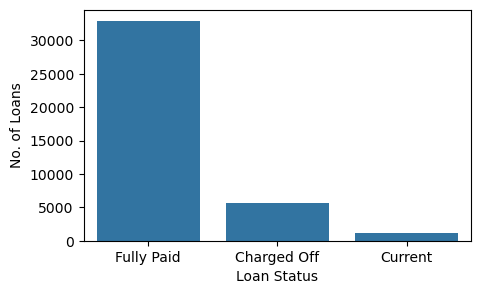

In [168]:
#Hist Plot to show the total number of loans versus Loan Status
plt.figure(figsize=(5,3))
grap = sns.countplot(x="loan_status", data=df)
grap.set(xlabel='Loan Status', ylabel='No. of Loans')
plt.show()

In [170]:
# Approved Loan Ratio
df['approved_loan_ratio'] = round((df.funded_amnt_inv/df.loan_amnt)*100,2)

/var/folders/wy/hh9y_svs031d5b6m72ty945c0000gn/T/ipykernel_19794/1793454065.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.approved_loan_ratio)


<Axes: xlabel='approved_loan_ratio', ylabel='Density'>

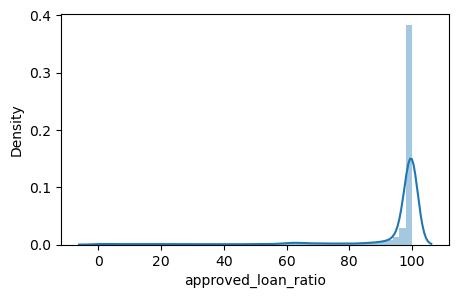

In [172]:
plt.figure(figsize=(5,3))
sns.distplot(df.approved_loan_ratio)

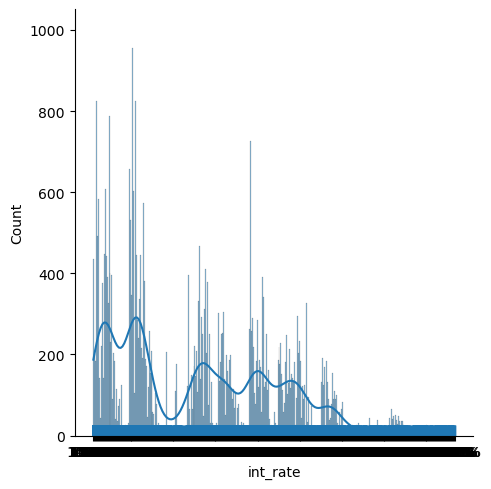

In [174]:
#Distplt for showing intrest rate
sns.displot(df.int_rate, rug=True,kde=True)

Text(0.5, 1.0, 'Month wise Distribution')

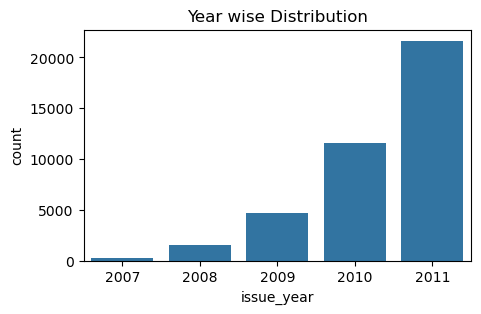

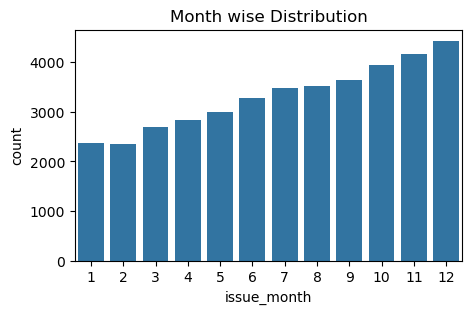

In [178]:

# Loan count versus Issue Year plt
plt.figure(figsize=(5,3))
sns.countplot(x ='issue_year', data = df)
plt.title('Year wise Distribution')

plt.figure(figsize=(5,3))
sns.countplot(x ='issue_month', data = df)
plt.title('Month wise Distribution')

Text(0.5, 0, 'Loan Status')

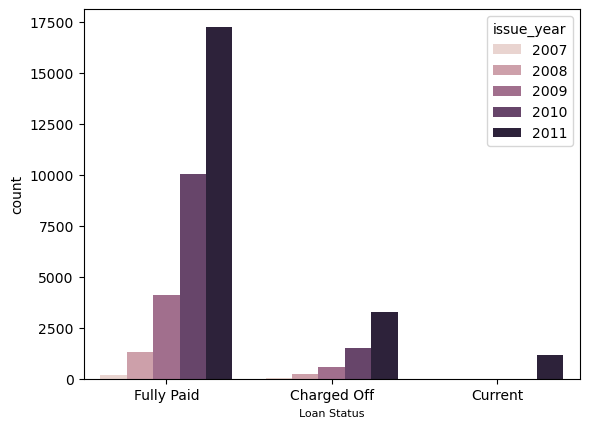

In [180]:
# Yearby year Loan Status Distribution 

sns.countplot(data=df,x='loan_status',hue='issue_year')
plt.xlabel('Loan Status',fontsize=8)

Text(0.5, 1.0, 'Employment Duration')

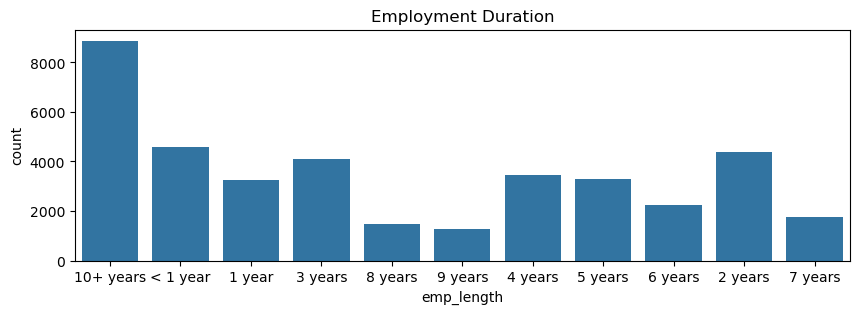

In [182]:
# Loan taken according to Employment Length

# Loan Issue Time

plt.figure(figsize=(10,3))
sns.countplot(x ='emp_length', data = df)
plt.title('Employment Duration')


Text(0, 0.5, 'Purpose (defaulters)')

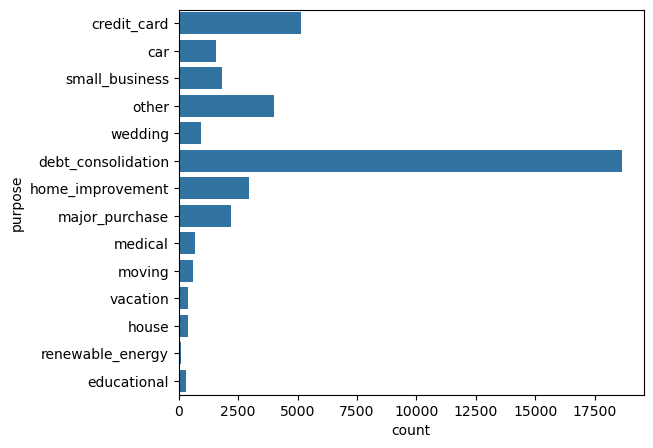

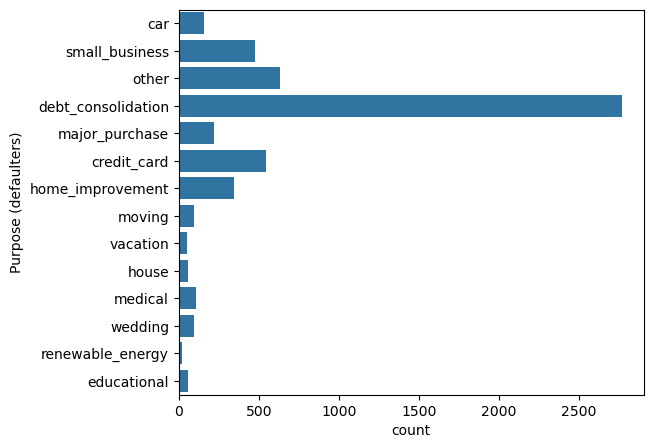

In [185]:
#Purpose Of Loan

plt.figure(figsize=(6,5))
sns.countplot(y ='purpose', data = df)


#Loan Defaulter - Loan Purpose

plt.figure(figsize=(6,5))
sns.countplot(y ='purpose', data = df[df.loan_status == 'Charged Off'])
plt.ylabel('Purpose (defaulters)')

Text(0.5, 0, 'Annual Income (Defaulters)')

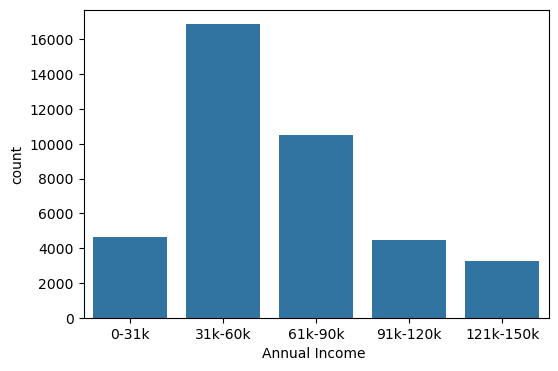

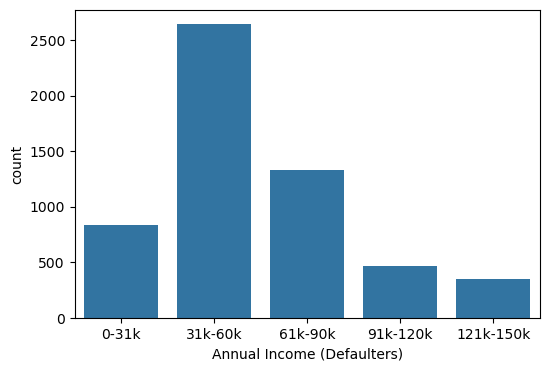

In [187]:
# Annual Income group

df['annual_income_group'] = pd.cut(df['annual_inc'], bins=[df['annual_inc'].min(),30000,60000,90000,120000,df['annual_inc'].max()],precision =0,labels =['0-31k','31k-60k','61k-90k','91k-120k','121k-150k'])

plt.figure(figsize=(6,4))
sns.countplot(x ='annual_income_group', data = df)
plt.xlabel('Annual Income ')

# Annual Income group - Defaulter

plt.figure(figsize=(6,4))
sns.countplot(x ='annual_income_group', data = df[df.loan_status == 'Charged Off'])
plt.xlabel('Annual Income (Defaulters)')

Text(0.5, 0, 'verification status (Defaulters)')

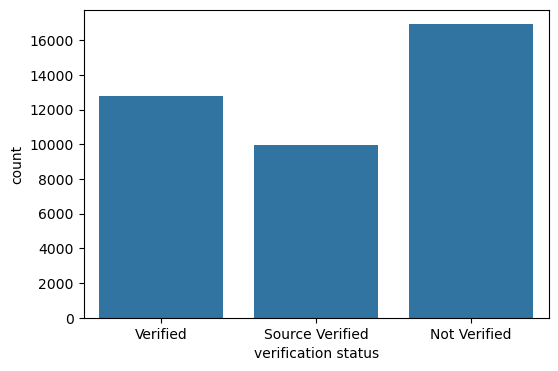

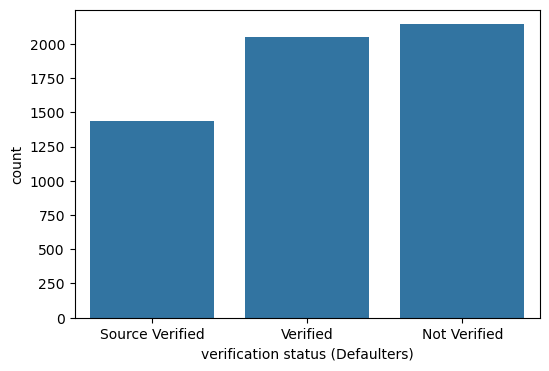

In [189]:
# Verification Status


plt.figure(figsize=(6,4))
sns.countplot(x ='verification_status', data = df)
plt.xlabel('verification status')

# Verification Status - Defaulter

plt.figure(figsize=(6,4))
sns.countplot(x ='verification_status', data = df[df.loan_status == 'Charged Off'])
plt.xlabel('verification status (Defaulters)')


<Axes: xlabel='home_ownership', ylabel='annual_inc'>

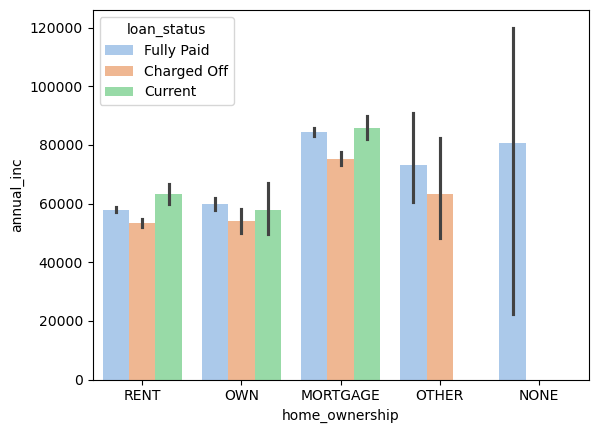

In [107]:
# Home Ownership With Anuual Income

sns.barplot(data =df,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")

In [193]:
# Annual Income - Loan Amount 

#sns.barplot(x = "annual_income_group", y = "loan_amnt", hue = 'loan_status', data = df)

<Axes: xlabel='loan_amnt', ylabel='purpose'>

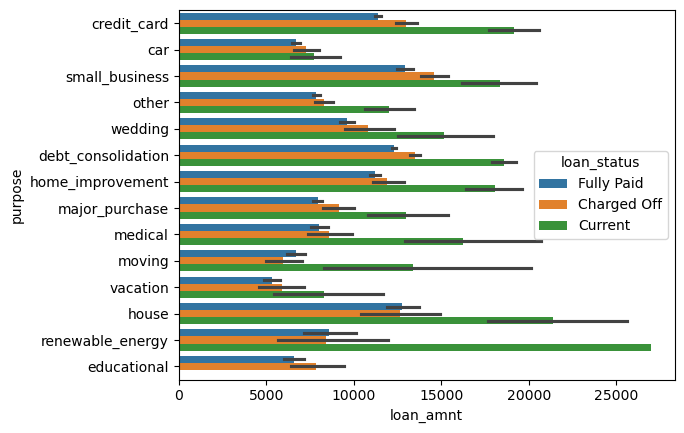

In [191]:
# Loan Purpose - Loan

sns.barplot(x = "loan_amnt", y = "purpose", hue = 'loan_status', data = df)